In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import import_ipynb
from DataPreparation import refine_df

In [9]:
df = pd.read_csv("US_Accidents_June20.csv")
#df = pd.read_csv("DataSubsetRaw.csv")
df = refine_df(df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 50 columns):
 #   Column                Dtype          
---  ------                -----          
 0   ID                    object         
 1   Source                object         
 2   TMC                   float64        
 3   Severity              int64          
 4   StartTime             datetime64[ns] 
 5   EndTime               datetime64[ns] 
 6   StartLat              float64        
 7   StartLng              float64        
 8   EndLat                float64        
 9   EndLng                float64        
 10  Distance              float64        
 11  Description           object         
 12  Number                float64        
 13  Street                object         
 14  Side                  object         
 15  City                  object         
 16  County                object         
 17  State                 object         
 18  Zipcode               

In [11]:
columns_time = ["StartTime",  
                "EndTime",    
                "Severity",
                "Distance",
                "Duration",
                "SunriseSunset",        
                "CivilTwilight",        
                "NauticalTwilight",     
                "AstronomicalTwilight"]

time_df = df[columns_time]

time_df.loc[:, "Time"] = time_df.apply(lambda x: x["StartTime"].replace(year=2020, month=1, day=1), axis=1)
time_df["Duration"] = time_df["Duration"].astype("timedelta64[s]")
time_df["Severity"] = time_df["Severity"].astype("str")
time_df["IsWeekDay"] = [(day.day_of_week in [0, 1, 2, 3, 4]) for day in time_df["StartTime"]]



C:\Users\danie\AppData\Local\Temp\ipykernel_14368\2432147202.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df.loc[:, "Time"] = time_df.apply(lambda x: x["StartTime"].replace(year=2020, month=1, day=1), axis=1)
C:\Users\danie\AppData\Local\Temp\ipykernel_14368\2432147202.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df["Duration"] = time_df["Duration"].astype("timedelta64[s]")


C:\Users\danie\AppData\Local\Temp\ipykernel_14368\2432147202.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df["Severity"] = time_df["Severity"].astype("str")


C:\Users\danie\AppData\Local\Temp\ipykernel_14368\2432147202.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df["IsWeekDay"] = [(day.day_of_week in [0, 1, 2, 3, 4]) for day in time_df["StartTime"]]


In [12]:
def x_tick_maker():
    ticks = []
    for i in range(8):
        ticks.append(f"{i*3}:00")
    ticks.append("00:00")
    return ticks

In [13]:
for index, row in time_df.iterrows():
    print(row["IsWeekDay"])
    break

True


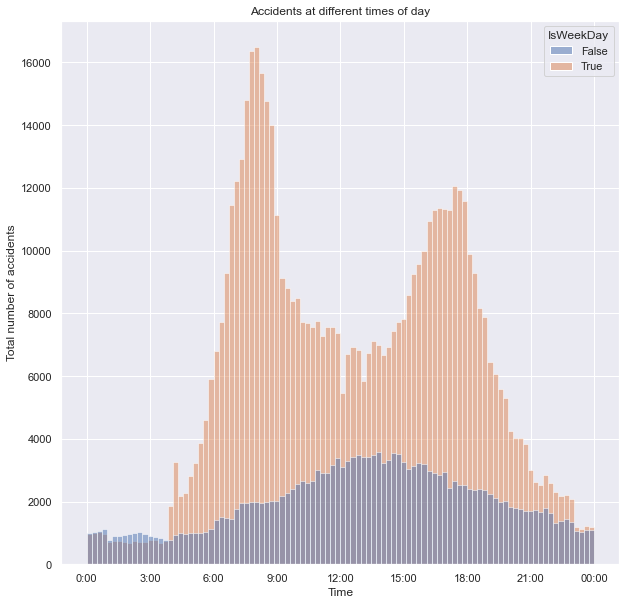

In [14]:
sns.set(rc = {"figure.figsize": (10, 10)})

x_weights = [1/5 if row["IsWeekDay"] else 1/2 for index, row in time_df.iterrows()]

sns.histplot(data=time_df, x="Time", hue="IsWeekDay", bins=100, weights=x_weights)
plt.ylabel("Total number of accidents")
plt.title("Accidents at different times of day")
plt.xticks(ticks=plt.xticks()[0], labels=x_tick_maker())
plt.savefig('foo.png', bbox_inches="tight")
plt.savefig('foo.pdf')
plt.show()